In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from data_process import tokenizers, utils
from nanoGPT.model import  GPT, GPTConfig
from lightning_training import LightningGPT, GamesDataModule, GamesDataset
import pytorch_lightning as pl
import torch

In [30]:
headers = ["index", "id", "date", "white_elo", "black_elo", "result", "ply", "ply_30s", "piece_uci"]

df = pd.read_csv("./data/csv/test.csv", delimiter=";", header=None, names=headers)

avg_elo = (df["white_elo"] + df["black_elo"]) / 2
df["avg_elo"] = avg_elo

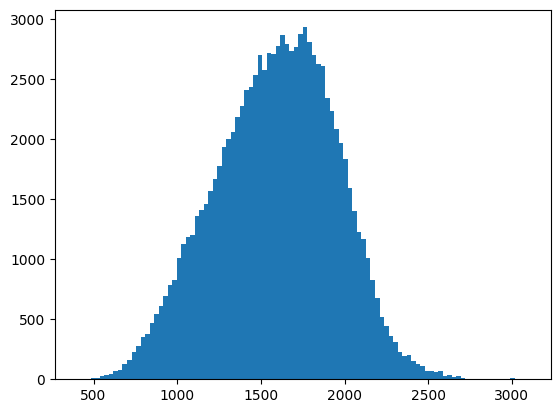

In [31]:
plt.hist(df.avg_elo, bins=100)
plt.show()

In [32]:
# df = df[df.avg_elo > 2500]

In [ ]:
df['piece_uci'] = utils.remove_material_tokens(df.piece_uci)

,index,id,date,white_elo,black_elo,result,ply,ply_30s,piece_uci,avg_elo
0,9865748,QjOBZIh0,2024.12.04,1744,1697,0-1,46,-1,Pe2e4 Pe7e6 Pd2d4 Pd7d5 Pe4d5 Pe6d5 Ng1f3 Ng8f...,1720.5
1,9865750,feY65TOZ,2024.12.04,3044,2990,1/2-1/2,148,48,Pd2d3 Pd7d5 Pg2g3 Pe7e5 Bf1g2 Ng8f6 Ng1f3 Nb8c...,3017.0
2,9865782,fV56oIcJ,2024.12.04,1645,1693,1-0,79,21,Pd2d4 Pe7e6 Bc1f4 Ng8f6 Pe2e3 Bf8e7 Pc2c3 Nf6e...,1669.0
3,9865783,TT8TVcp1,2024.12.04,1607,1599,1-0,63,-1,Pe2e4 Pe7e5 Ng1f3 Pd7d6 Pc2c3 Nb8c6 Pd2d4 Pf7f...,1603.0
4,9865784,Bn0SM1cs,2024.12.04,2326,2368,1-0,37,-1,Pg2g3 Ng8f6 Bf1g2 Pe7e5 Pd2d3 Pd7d6 Nb1d2 Nb8d...,2347.0
...,...,...,...,...,...,...,...,...,...,...
99995,10027123,AoDN4eTI,2024.12.04,960,1009,1-0,27,-1,Pe2e4 Pe7e5 Pd2d4 Pd7d6 Ng1f3 Ng8f6 Pd4e5 Pd6e...,984.5
99996,10027124,XLKZ0rGS,2024.12.04,1154,1037,1-0,99,93,Pe2e4 Pd7d5 Pe4e5 Pe7e6 Pd2d4 Nb8c6 Ng1f3 Ng8e...,1095.5
99997,10027125,bbadMpMs,2024.12.04,1505,1539,0-1,34,-1,Pe2e4 Pe7e5 Ng1f3 Pd7d6 Ph2h3 Pa7a6 Bf1c4 Nb8c...,1522.0
99998,10027126,p20vlsiK,2024.12.04,1908,2058,0-1,130,-1,Pd2d4 Pd7d5 Pc2c4 Pe7e6 Pe2e3 Ng8f6 Ng1f3 Bf8b...,1983.0


In [33]:
games = utils.remove_material_tokens(df.piece_uci)
games

0        Pe2e4 Pe7e6 Pd2d4 Pd7d5 Pe4d5 Pe6d5 Ng1f3 Ng8f...
1        Pd2d3 Pd7d5 Pg2g3 Pe7e5 Bf1g2 Ng8f6 Ng1f3 Nb8c...
2        Pd2d4 Pe7e6 Bc1f4 Ng8f6 Pe2e3 Bf8e7 Pc2c3 Nf6e...
3        Pe2e4 Pe7e5 Ng1f3 Pd7d6 Pc2c3 Nb8c6 Pd2d4 Pf7f...
4        Pg2g3 Ng8f6 Bf1g2 Pe7e5 Pd2d3 Pd7d6 Nb1d2 Nb8d...
                               ...                        
99995    Pe2e4 Pe7e5 Pd2d4 Pd7d6 Ng1f3 Ng8f6 Pd4e5 Pd6e...
99996    Pe2e4 Pd7d5 Pe4e5 Pe7e6 Pd2d4 Nb8c6 Ng1f3 Ng8e...
99997    Pe2e4 Pe7e5 Ng1f3 Pd7d6 Ph2h3 Pa7a6 Bf1c4 Nb8c...
99998    Pd2d4 Pd7d5 Pc2c4 Pe7e6 Pe2e3 Ng8f6 Ng1f3 Bf8b...
99999    Pd2d4 Ng8f6 Pc2c4 Pe7e6 Ng1f3 Pd7d5 Pe2e3 Nb8d...
Name: piece_uci, Length: 100000, dtype: object

In [34]:
games_with_elo = utils.add_elo_token_to_games(games, df.white_elo, df.black_elo)
games_with_elo

0        1700 1600 Pe2e4 Pe7e6 Pd2d4 Pd7d5 Pe4d5 Pe6d5 ...
1        3000 2900 Pd2d3 Pd7d5 Pg2g3 Pe7e5 Bf1g2 Ng8f6 ...
2        1600 1600 Pd2d4 Pe7e6 Bc1f4 Ng8f6 Pe2e3 Bf8e7 ...
3        1600 1500 Pe2e4 Pe7e5 Ng1f3 Pd7d6 Pc2c3 Nb8c6 ...
4        2300 2300 Pg2g3 Ng8f6 Bf1g2 Pe7e5 Pd2d3 Pd7d6 ...
                               ...                        
99995    900 1000 Pe2e4 Pe7e5 Pd2d4 Pd7d6 Ng1f3 Ng8f6 P...
99996    1100 1000 Pe2e4 Pd7d5 Pe4e5 Pe7e6 Pd2d4 Nb8c6 ...
99997    1500 1500 Pe2e4 Pe7e5 Ng1f3 Pd7d6 Ph2h3 Pa7a6 ...
99998    1900 2000 Pd2d4 Pd7d5 Pc2c4 Pe7e6 Pe2e3 Ng8f6 ...
99999    2200 2200 Pd2d4 Ng8f6 Pc2c4 Pe7e6 Ng1f3 Pd7d5 ...
Length: 100000, dtype: object

In [35]:
tokenizer = tokenizers.FullMoveTokenizerWithElo()
games_without_elo = tokenizer.unk_elo_token + " " + tokenizer.unk_elo_token + " " + games
games_without_elo

0        [UNK_ELO] [UNK_ELO] Pe2e4 Pe7e6 Pd2d4 Pd7d5 Pe...
1        [UNK_ELO] [UNK_ELO] Pd2d3 Pd7d5 Pg2g3 Pe7e5 Bf...
2        [UNK_ELO] [UNK_ELO] Pd2d4 Pe7e6 Bc1f4 Ng8f6 Pe...
3        [UNK_ELO] [UNK_ELO] Pe2e4 Pe7e5 Ng1f3 Pd7d6 Pc...
4        [UNK_ELO] [UNK_ELO] Pg2g3 Ng8f6 Bf1g2 Pe7e5 Pd...
                               ...                        
99995    [UNK_ELO] [UNK_ELO] Pe2e4 Pe7e5 Pd2d4 Pd7d6 Ng...
99996    [UNK_ELO] [UNK_ELO] Pe2e4 Pd7d5 Pe4e5 Pe7e6 Pd...
99997    [UNK_ELO] [UNK_ELO] Pe2e4 Pe7e5 Ng1f3 Pd7d6 Ph...
99998    [UNK_ELO] [UNK_ELO] Pd2d4 Pd7d5 Pc2c4 Pe7e6 Pe...
99999    [UNK_ELO] [UNK_ELO] Pd2d4 Ng8f6 Pc2c4 Pe7e6 Ng...
Name: piece_uci, Length: 100000, dtype: object

In [36]:
elo_data_module = GamesDataModule(test_games=list(games_with_elo), tokenizer=tokenizer, num_workers=8)
no_elo_data_module = GamesDataModule(test_games=list(games_without_elo), tokenizer=tokenizer, num_workers=8)

In [37]:
model_config = GPTConfig(
    block_size=302,
    vocab_size=tokenizer.vocab_size,
    n_layer=8,
    n_head=8,
    n_embd=512,
    bias=False,
)

elo_checkpoint = "./models/elo_training/epoch=4-step=468740.ckpt"
no_elo_checkpoint = "./models/no_elo_training/epoch=4-step=468740.ckpt"

test_start_token = 1

elo_model = LightningGPT.load_from_checkpoint(elo_checkpoint, config=model_config, test_start_token=test_start_token)
no_elo_model = LightningGPT.load_from_checkpoint(no_elo_checkpoint, config=model_config, test_start_token=test_start_token)

number of parameters: 27.29M
number of parameters: 27.29M


In [38]:
trainer = pl.Trainer(
    accelerator="gpu",
    max_epochs=10,
    callbacks=[pl.callbacks.RichProgressBar()],
    precision="bf16-mixed",
)
torch.set_float32_matmul_precision('high')

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [39]:
trainer.test(elo_model, datamodule=elo_data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.49848422408103943    │
│         test_loss         │    1.5753401517868042     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.5753401517868042, 'test_acc': 0.49848422408103943}]

In [40]:
trainer.test(no_elo_model, datamodule=no_elo_data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.49599578976631165    │
│         test_loss         │    1.5673227310180664     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.5673227310180664, 'test_acc': 0.49599578976631165}]

In [ ]:
elo_acc = {}
no_elo_acc = {}

for elo in range(500, 3001, 100):
    df_elo = df[(df.avg_elo >= elo) & (df.avg_elo < elo + 100)]
    games = df_elo.piece_uci
    games_with_elo = utils.add_elo_token_to_games(games, df_elo.white_elo, df_elo.black_elo)
    games_without_elo = tokenizer.unk_elo_token + " " + tokenizer.unk_elo_token + " " + games

    elo_data_module = GamesDataModule(test_games=list(games_with_elo), tokenizer=tokenizer, num_workers=8)
    no_elo_data_module = GamesDataModule(test_games=list(games_without_elo), tokenizer=tokenizer, num_workers=8)

    elo_test = trainer.test(elo_model, datamodule=elo_data_module, verbose=False)
    no_elo_test = trainer.test(no_elo_model, datamodule=no_elo_data_module, verbose=False)

    elo_acc[elo] = elo_test[0]["test_acc"]
    no_elo_acc[elo] = no_elo_test[0]["test_acc"]


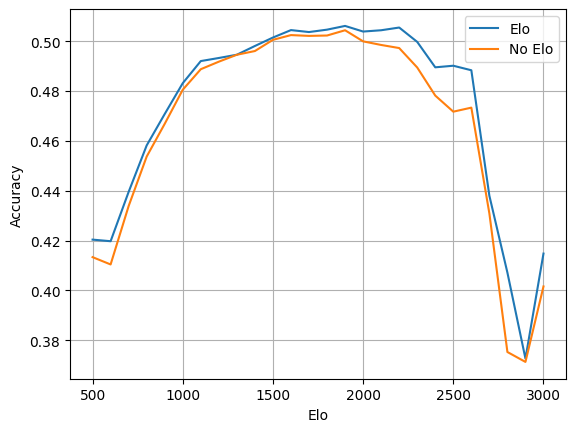

In [55]:
plt.plot(elo_acc.keys(), elo_acc.values(), label="Elo")
plt.plot(no_elo_acc.keys(), no_elo_acc.values(), label="No Elo")
plt.legend()
plt.grid()
plt.xlabel("Elo")
plt.ylabel("Accuracy")
plt.show()

In [57]:
accuracy_df = pd.DataFrame({"elo": list(elo_acc.keys()), "elo_acc": list(elo_acc.values()), "no_elo_acc": list(no_elo_acc.values())})
accuracy_df

,elo,elo_acc,no_elo_acc
0,500,0.420400,0.413365
1,600,0.419760,0.410430
2,700,0.439564,0.433882
3,800,0.458205,0.453732
4,900,0.470823,0.466878
5,1000,0.483187,0.480552
6,1100,0.492062,0.488795
7,1200,0.493298,0.491815
8,1300,0.494608,0.494598
9,1400,0.498114,0.496090
